# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [2000]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2001]:
DATASET_PATH = "./data/pokemon/"

In [2002]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_dataset = pd.read_csv(DATASET_PATH + 'pokemon.csv'
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [2003]:
#información sobre el datset:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [2004]:
my_dataset.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [2005]:
my_data = my_dataset

In [2006]:
#Separamos los datos:
y = my_data.is_legendary
X = my_data.drop(['is_legendary'], axis=1)

In [2007]:
#Seleccionamos columnas categóricas
s = (my_data.dtypes == 'object')
columnas_categoricas = list(s[s].index)

In [2008]:
#Codificamos variables categoricas:
OHE_X = pd.get_dummies(X[columnas_categoricas])

In [2009]:
#estandarizamos los datos:
#creamos la instancia:
scaler = StandardScaler()
# Aplicamos la estadarizacion:
OHE_X_estandarizado = scaler.fit_transform(OHE_X)#nos quedo un array numpy

In [2010]:
#divimos en entrenamiento y testeo:
X_train, X_test, y_train, y_test = train_test_split(OHE_X_estandarizado, y, train_size=0.8, test_size=0.2, random_state=0)


In [2011]:
#tratamos los datos perdidos (para reemplazarlos por "mean" primero deben ser tipos de datos numericos, nada de variables categoricas):
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp.fit_transform(X_train)
# Trasladar la transformación al conjunto de prueba
X_test = imp.transform(X_test)

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [2012]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [2013]:
#Logistic regressor:
LR_model = LogisticRegression(max_iter=2500)
#entrenamos el modelo:
LR_model.fit(X_train, y_train)
#hacemos predicciones:
y_pred = LR_model.predict(X_test) 

In [2014]:
print("Accuracy: ", np.mean(y_pred == y_test))
print("Train accuracy:", accuracy_score(y_train, LR_model.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Accuracy:  0.906832298136646
Train accuracy: 1.0
Test accuracy: 0.906832298136646


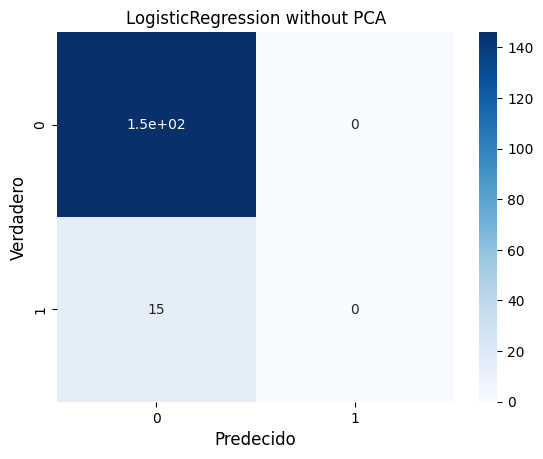

In [2015]:
#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predecido', fontsize=12)
plt.ylabel('Verdadero', fontsize=12)
plt.title("LogisticRegression without PCA")
plt.show()

In [2016]:
#Logistic regressor CV:
LRCV_model = LogisticRegressionCV(Cs=2, max_iter=2500)
#entrenamos el modelo:
LRCV_model.fit(X_train, y_train)
#hacemos predicciones:
y_pred_CV = LRCV_model.predict(X_test) 

In [2017]:
print("Accuracy CV: ", np.mean(y_pred_CV == y_test))
print("Train accuracy CV:", accuracy_score(y_train, LRCV_model.predict(X_train)))
print("Test accuracy CV:", accuracy_score(y_test, y_pred_CV))

Accuracy CV:  0.906832298136646
Train accuracy CV: 0.9140625
Test accuracy CV: 0.906832298136646


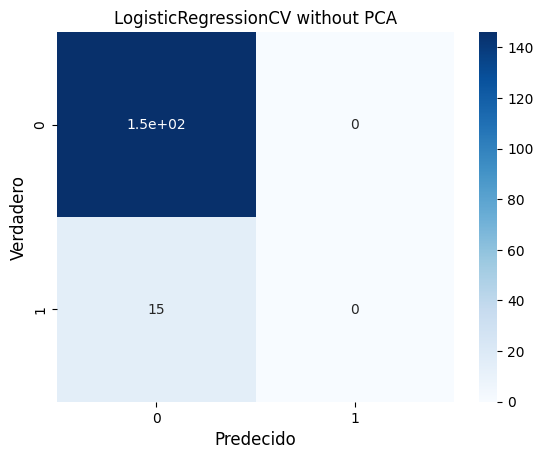

In [2018]:

#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_CV)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion matriz CV")
plt.xlabel('Predecido', fontsize=12)
plt.ylabel('Verdadero', fontsize=12)
plt.title("LogisticRegressionCV without PCA")
plt.show()

Puede ser que las características que estamos utilizando para entrenar el modelo esten demasiado correlacionadas con la variable legendario, el modelo puede aprender a depender demasiado de esas características y no generalizar bien. Tal vez se esta produciendo Overfitting. Vamos a probar PCA y ver que pasa:

In [2019]:
#PCA:
pca = PCA(0.85)
pca_train = pca.fit_transform(X_train)
#varianza explicada por nuestra nueva dimensión de datos:
print("Varianza: ", sum(pca.explained_variance_ratio_))
print("numero de componentes: {}, anteriomente: {}".format(pca.n_components_, OHE_X.shape[1]))

Varianza:  0.850888911340136
numero de componentes: 495, anteriomente: 2742


In [2020]:
#aplicamos PCA A los datos de testeo:
pca_test = pca.transform(X_test)

In [2021]:
#creamos el modelo:
LRCV_model_with_pca = LogisticRegressionCV(Cs=2, max_iter=1000)
#entrenar modelo:
LRCV_model_with_pca.fit(pca_train, y_train)
#Hacemos predicciones
y_pred_with_pca = LRCV_model_with_pca.predict(pca_test)


In [2022]:
print("Accuracy with pca: ", np.mean(y_pred_with_pca == y_test))
print("Train accuracy with pca:", accuracy_score(y_train, LRCV_model_with_pca.predict(pca_train)))
print("Test accuracy with pca:", accuracy_score(y_test, y_pred_with_pca))

Accuracy with pca:  0.906832298136646
Train accuracy with pca: 0.9140625
Test accuracy with pca: 0.906832298136646


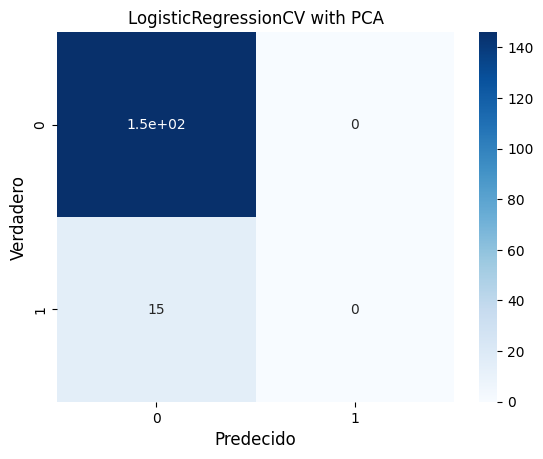

In [2023]:
#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_with_pca)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predecido', fontsize=12)
plt.ylabel('Verdadero', fontsize=12)
plt.title("LogisticRegressionCV with PCA")
plt.show()

No hay cambios notables, solo que se reducio notablemente la dimensionalidad del dataset con el que se trabaja.

OTRO ENFOQUE:

LO ANTERIOR NO TRAJO BUENOS RESULTADOS, VAMOS A MIRAR DETALLADAMENTE CADA VARIABLE CATEGORICA Y DEDUCIR CUAL ES INTERESANTE DE CONSERVAR:

<Axes: xlabel='classfication', ylabel='count'>

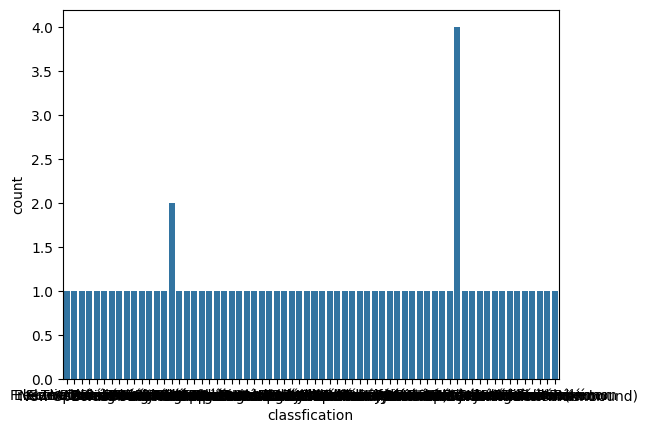

In [2024]:
#Exploramos la Variable Objetivo para los pokemones  legendarios:
variable_objetivo = my_dataset[my_dataset['is_legendary'] == True]
#vemos como se distribuye la variable categorica que se pone en x con respecto a data, en este caso con respecto a los pokemones legendarios:
sns.countplot(x='classfication', data=variable_objetivo)

<Axes: xlabel='name', ylabel='count'>

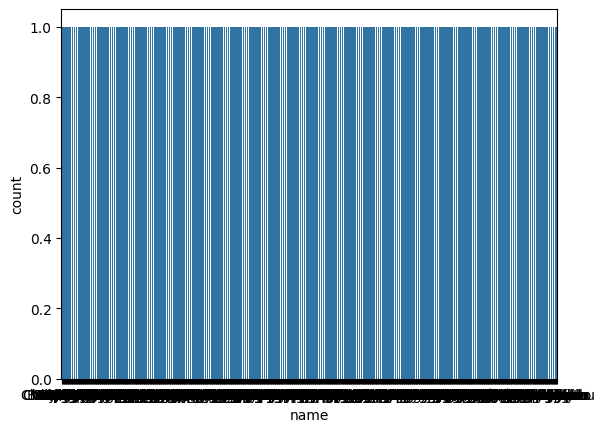

In [2025]:
#Exploramos la Variable Objetivo para los pokemones no legendarios:
variable_objetivo = my_dataset[my_dataset['is_legendary'] != True]
#vemos como se distribuye la variable categorica que se pone en x con respecto a data, en este caso con respecto a los pokemones legendarios:
sns.countplot(x='name', data=variable_objetivo)

Variables como name, japanese name no nos dan información para indicar si un pokemon es legendario o no, ya que cada uno tiene un nombre distinto.
Similar para la variable categorica pokedex_number, cada uno tiene el propio

In [2026]:
my_data = my_dataset.drop(['name', 'japanese_name', 'pokedex_number'], axis=1)
#my_data = my_dataset
#SI PROBAMOS SIN ELIMINAR ESTAR TRES COLUMNAS, EL ERROR AUMENTA.


In [2027]:
#en esta parte vamos a comparar la media de cada variable categorica de tipo no objeto, esto lo hacemos para ver donde se marcan las diferencias entre pokemones legendary y no legendary:
s = (my_data.dtypes != 'object')
columnas_no_categoricas = list(s[s].index)

my_data = my_data[columnas_no_categoricas]
leg = my_data[my_data['is_legendary'] == True]
for i in range(my_data.shape[1]):
    leg_total = leg[my_data.columns[i]].mean()
    non_leg_total = my_data[my_data['is_legendary'] != True][my_data.columns[i]].mean()
    result_df  = pd.DataFrame([leg_total, non_leg_total], index=['Legendary', 'non-Legendary'], columns=[my_data.columns[i]])
    print(result_df)

               against_bug
Legendary         1.050000
non-Legendary     0.991108
               against_dark
Legendary          1.250000
non-Legendary      1.038646
               against_dragon
Legendary            0.985714
non-Legendary        0.967168
               against_electric
Legendary              1.025000
non-Legendary          1.078659
               against_fairy
Legendary           1.153571
non-Legendary       1.060876
               against_fight
Legendary           0.928571
non-Legendary       1.078659
               against_fire
Legendary          1.110714
non-Legendary      1.137825
               against_flying
Legendary            1.071429
non-Legendary        1.204514
               against_ghost
Legendary           1.292857
non-Legendary       0.955540
               against_grass
Legendary           0.853571
non-Legendary       1.051300
               against_ground
Legendary            1.128571
non-Legendary        1.095075
               against_ice
Legendary 

Del analisis anterior podemos inducir que las siguientes son las variables numericas que marcan mayor diferencia entre legenday y no legendary:
base_egg_steps, sp_attack, sp_defense, weight_kg, base_total, base_happiness, attack

In [2028]:
#tomamos del dataset solo lo importante:
my_data_with_other_approach = my_dataset[['base_egg_steps', 'sp_attack', 'sp_defense', 'weight_kg', 'base_total', 'base_happiness', 'attack', 'is_legendary', 'experience_growth']]

#En este caso no considero las variables categoricas.

PROBAMOS NUESTROS MODELOS:

In [2029]:
#Separamos EL DATASET:
y_with_other_approach = my_data_with_other_approach.is_legendary
X_with_other_approach = my_data_with_other_approach.drop(['is_legendary'], axis=1)

In [2030]:
#divimos en entrenamiento y testeo:
X_train, X_test, y_train, y_test = train_test_split(X_with_other_approach, y_with_other_approach, train_size=0.8, test_size=0.2, random_state=0)

In [2031]:
#tratamos los datos perdidos (para reemplazarlos por "mean" primero deben ser tipos de datos numericos, nada de variables categoricas):
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp.fit_transform(X_train)

# Trasladar la transformación al conjunto de prueba
X_test = imp.transform(X_test)

In [2032]:
#Logistic regressor:
LR_model = LogisticRegression(max_iter=2500)
#entrenamos el modelo:
LR_model.fit(X_train, y_train)
#hacemos predicciones:
y_pred = LR_model.predict(X_test) 

In [2033]:
print("Accuracy: ", np.mean(y_pred == y_test))
print("Train accuracy:", accuracy_score(y_train, LR_model.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Accuracy:  0.9875776397515528
Train accuracy: 0.984375
Test accuracy: 0.9875776397515528


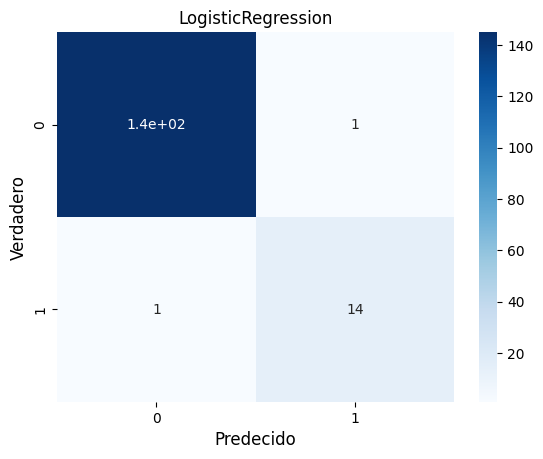

In [2034]:
#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predecido', fontsize=12)
plt.ylabel('Verdadero', fontsize=12)
plt.title("LogisticRegression")
plt.show()

LOGISTIC REGRESSOR CV:

In [2035]:
#creamos el modelo:
LRCV_with_other_approach = LogisticRegressionCV(Cs=2, max_iter=1000)
#entrenar modelo:
LRCV_with_other_approach.fit(X_train, y_train)
#Hacemos predicciones
y_pred = LRCV_with_other_approach.predict(X_test)

In [2036]:
print("Accuracy: ", np.mean(y_pred == y_test))
print("Train accuracy:", accuracy_score(y_train, LRCV_with_other_approach.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Accuracy:  0.9875776397515528
Train accuracy: 0.9859375
Test accuracy: 0.9875776397515528


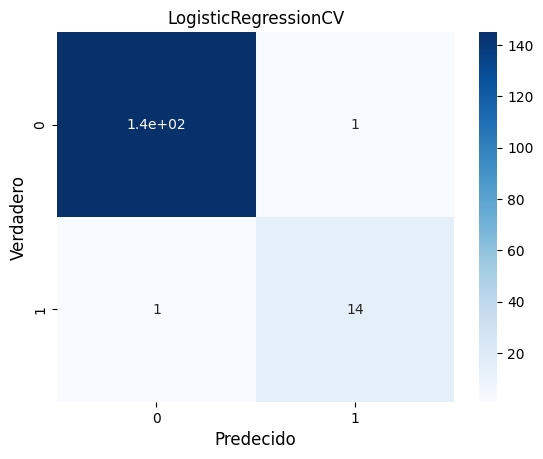

In [2037]:
#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predecido', fontsize=12)
plt.ylabel('Verdadero', fontsize=12)
plt.title("LogisticRegressionCV")
plt.show()